Edges to cut between communities: [(8, 28), (45, 47)]


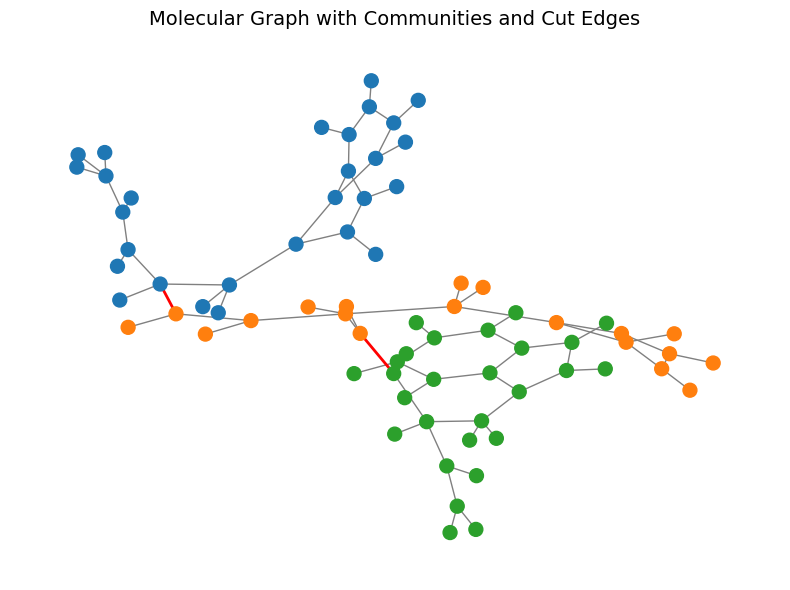

[[('H', array([ 8.933, -4.979,  2.305])), ('C', array([ 9.321, -5.057,  1.291])), ('H', array([ 9.359, -6.1  ,  0.984])), ('H', array([10.32 , -4.626,  1.245])), ('C', array([ 8.416, -4.292,  0.353])), ('O', array([ 8.855, -3.341, -0.276])), ('N', array([ 7.158, -4.719,  0.266])), ('H', array([ 6.891, -5.512,  0.825])), ('C', array([ 6.1  , -4.062, -0.511])), ('H', array([ 5.236, -3.194,  0.422])), ('H', array([ 6.544, -3.407, -1.262])), ('C', array([ 5.292, -5.149, -1.246])), ('H', array([ 5.993, -5.772, -1.803])), ('H', array([ 4.809, -5.794, -0.511])), ('C', array([ 4.248, -4.676, -2.216])), ('C', array([ 3.013, -4.234, -1.888])), ('H', array([ 2.632, -4.167, -0.876])), ('N', array([ 2.333, -3.846, -3.024])), ('H', array([ 1.457, -3.331, -2.994])), ('C', array([ 3.075, -4.079, -4.159])), ('C', array([ 2.825, -3.87 , -5.524])), ('H', array([ 1.866, -3.495, -5.848])), ('C', array([ 3.84 , -4.149, -6.456])), ('H', array([ 3.662, -4.001, -7.513])), ('C', array([ 5.087, -4.623, -6.011]))

In [4]:
#!pip install xyz2graph
#!pip install "numpy<2.0"
import matplotlib.pyplot as plt
from xyz2graph import MolGraph
from networkx.algorithms.community import louvain_communities, modularity
import networkx as nx
import numpy as np

def MakeGraph(File_Path):
  mg = MolGraph()
  mg.read_xyz(File_Path)
  G = mg.to_networkx()
  return(G)

def best_louvain_partition(graph, num_trials=10):
    best_modularity = -1
    best_partition = None

    for seed in range(num_trials):
            partition = louvain_communities(graph,resolution=0.1, seed=seed)
            mod_score = modularity(graph, partition)
            if mod_score > best_modularity:
              best_partition = partition
    return best_partition


def visualisation(communities):
  node_to_comm = {}               # More storage but faster look up
  comm_id = 0
  for comm in communities:      # divives all nodes into communites
    for node in comm:
        node_to_comm[node] = comm_id
    comm_id += 1

  edges_to_cut = []
  edges_to_keep = []
  for u, v in Graph.edges():
    if node_to_comm[u] != node_to_comm[v]:    #If connects 2 clusters
        edges_to_cut.append((u, v))
    else:
        edges_to_keep.append((u, v))

  print("Edges to cut between communities:",edges_to_cut) # pre-processing for grpahing above [don't remove]

  num_comms = len(communities)
  colors = plt.cm.tab10.colors  # up to 10 distinct colors
  node_colors = [colors[node_to_comm[n] % len(colors)] for n in Graph.nodes()]

  plt.figure(figsize=(8, 6))
  pos = nx.spring_layout(Graph, seed=42)  # position nodes with spring layout
  nx.draw_networkx_nodes(Graph, pos, node_color=node_colors, node_size=100)
  nx.draw_networkx_edges(Graph, pos, edgelist=edges_to_keep, edge_color='gray')
  nx.draw_networkx_edges(Graph, pos, edgelist=edges_to_cut, edge_color='red', width=2) #funky at times

  plt.title("Molecular Graph with Communities and Cut Edges", fontsize=14)
  plt.axis('off')
  plt.tight_layout()
  plt.show()
  return edges_to_cut

def read_xyz(File_Path):            #auxiliary function
  with open(File_Path, 'r') as f:
        lines = f.readlines()
  atoms = []
  coords = []
  for line in lines[2:]:  # skip count and comment lines
      parts = line.strip().split()
      atoms.append(parts[0])
      coords.append(np.array([float(x) for x in parts[1:4]]))
  return atoms, coords


def get_fragment_atom_lists_with_caps(File_Path, fragment_list,cut_edges):
    atoms, coords = read_xyz(File_Path)

    fragments = [[] for _ in range(len(fragment_list))]

    for frag_idx in range(len(fragment_list)):
        fragment = fragment_list[frag_idx]
        for j in fragment:
            fragments[frag_idx].append((atoms[j], coords[j]))
            # Check cut edges involving atom j
            for edge in cut_edges:
                if j in edge:
                    other = edge[1] if edge[0] == j else edge[0]
                    fragments[frag_idx].append(('H', coords[other]))  # could later add caps at a specfic distacne

    return fragments


def write_xyz_fragments(fragments, File_Path):
  base_name=(File_Path.split('.xyz')[0])
  for idx, frag in enumerate(fragments):
      file_name = f"{base_name}_Frag_{idx+1}.xyz"
      with open(file_name, "w") as f:
          f.write(f"{len(frag)}\n")                      # Line 1: number of atoms
          f.write(f"Fragment {idx+1}\n")                 # Line 2: comment
          for atom, coord in frag:
              x, y, z = coord
              f.write(f"{atom} {x:.3f} {y:.3f} {z:.3f}\n")



File_Path = "/content/TRP_HIS_TRP_1.xyz"          # Used to make graph
Graph = MakeGraph(File_Path)
fragment_list = best_louvain_partition(Graph)
cut_edges = visualisation(fragment_list)
fragments_final = get_fragment_atom_lists_with_caps(File_Path,fragment_list,cut_edges)
print(fragments_final)
write_xyz_fragments(fragments_final,File_Path)



Edges to cut: [(30, 32)]


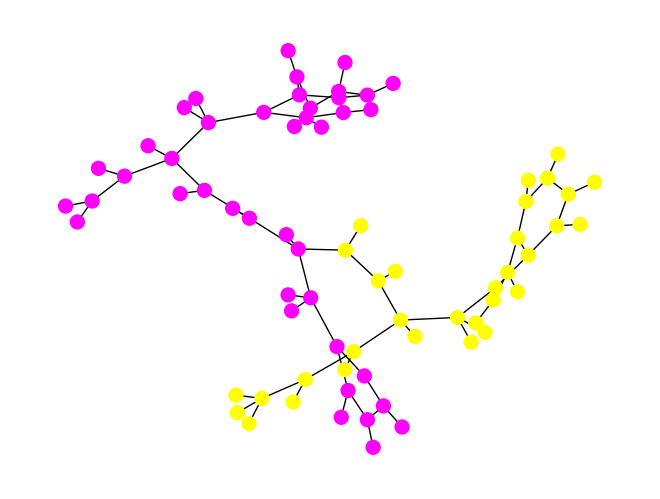

[[('H', array([ 8.933, -4.979,  2.305])), ('C', array([ 9.321, -5.057,  1.291])), ('H', array([ 9.359, -6.1  ,  0.984])), ('H', array([10.32 , -4.626,  1.245])), ('C', array([ 8.416, -4.292,  0.353])), ('O', array([ 8.855, -3.341, -0.276])), ('N', array([ 7.158, -4.719,  0.266])), ('H', array([ 6.891, -5.512,  0.825])), ('C', array([ 6.1  , -4.062, -0.511])), ('H', array([ 6.544, -3.407, -1.262])), ('C', array([ 5.292, -5.149, -1.246])), ('H', array([ 5.993, -5.772, -1.803])), ('H', array([ 4.809, -5.794, -0.511])), ('C', array([ 4.248, -4.676, -2.216])), ('C', array([ 3.013, -4.234, -1.888])), ('H', array([ 2.632, -4.167, -0.876])), ('N', array([ 2.333, -3.846, -3.024])), ('H', array([ 1.457, -3.331, -2.994])), ('C', array([ 3.075, -4.079, -4.159])), ('C', array([ 2.825, -3.87 , -5.524])), ('H', array([ 1.866, -3.495, -5.848])), ('C', array([ 3.84 , -4.149, -6.456])), ('H', array([ 3.662, -4.001, -7.513])), ('C', array([ 5.087, -4.623, -6.011])), ('H', array([ 5.865, -4.84 , -6.73 ]))

In [5]:
# ! pip install xyz2graph
# !pip install scipy
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from xyz2graph import MolGraph
from networkx import adjacency_matrix
from scipy.sparse import csr_matrix

def MakeAdjecencyMatrix(File_Path):
  mg = MolGraph()
  mg.read_xyz(File_Path)
  G = mg.to_networkx()
  A = adjacency_matrix(G)
  return(A)                   # Provides a Adj_Matrix to work with

def cut_ratio(Adj_Matrix, order, k):            # Assigns Cut score
    n = Adj_Matrix.shape[0]                     # Gets Number of Nodes
    edge_boundary = 0                           # Counter for number of edges to cut
    for i in range(k + 1):
        for j in range(k + 1, n):               # Counts number of edges between groups
            edge_boundary += Adj_Matrix[order[i], order[j]]
    denominator = min(k + 1, n - k - 1)         # Keeps balance of groups
    return edge_boundary / denominator

def spectral_cut2(A_dense):
    n = A_dense.shape[0]                        # Gets Number of Nodes
    degrees = A_dense.sum(axis=1)               # List of Degree of each node
    D = np.diag(degrees)                        # Makes diagonal matrix from Degree
    L = D - A_dense                             # Makes Lapacian Matrix
    w, v = np.linalg.eigh(L)                    # finds eigenvalues and eigenvectors
    order = np.argsort(v[:, np.argsort(w)[1]])  # Find second smallest eigenvector

    phi = np.zeros(n - 1)                       # List for Cut Scores
    for k in range(n - 1):                      # gets cut score for each node
      phi[k] = cut_ratio(A_dense, order, k)
    imin = np.argmin(phi)                       # finds node with smallest cut score

    return order[:imin + 1], order[imin + 1:],order,imin   # points before and after the cut point

def get_cut_edges(adj_matrix, order, imin):
    left = order[:imin + 1]
    right = order[imin + 1:]
    cut_edges = []
    for i in left:
        for j in right:
            if adj_matrix[i, j] != 0:         # From the cut point checks for edges
                cut_edges.append((i, j))
    return cut_edges

def viz_cut(G, s, pos=None, node_size=100, with_labels=False):
    n = G.number_of_nodes()
    assign = np.zeros(n)
    assign[s] = 1
    if pos is None:
        pos = nx.spring_layout(G)
    nx.draw(G, node_color=assign, pos=pos, with_labels=with_labels,
            cmap='spring', node_size=node_size, font_color='k')
    plt.show()

def read_xyz(File_Path):            #auxiliary function
  with open(File_Path, 'r') as f:
        lines = f.readlines()
  atoms = []
  coords = []
  for line in lines[2:]:  # skip count and comment lines
      parts = line.strip().split()
      atoms.append(parts[0])
      coords.append(np.array([float(x) for x in parts[1:4]]))
  return atoms, coords


def get_fragment_atom_lists_with_caps(File_Path, fragment_list,cut_edges):
    atoms, coords = read_xyz(File_Path)

    fragments = [[] for _ in range(len(fragment_list))]

    for frag_idx in range(len(fragment_list)):
        fragment = fragment_list[frag_idx]
        for j in fragment:
            fragments[frag_idx].append((atoms[j], coords[j]))
            # Check cut edges involving atom j
            for edge in cut_edges:
                if j in edge:
                    other = edge[1] if edge[0] == j else edge[0]
                    fragments[frag_idx].append(('H', coords[other]))  # could later add caps at a specfic distacne

    return fragments


def write_xyz_fragments(fragments, File_Path):
  base_name=(File_Path.split('.xyz')[0])
  for idx, frag in enumerate(fragments):
      file_name = f"{base_name}_Frag_{idx+1}.xyz"
      with open(file_name, "w") as f:
          f.write(f"{len(frag)}\n")                      # Line 1: number of atoms
          f.write(f"Fragment {idx+1}\n")                 # Line 2: comment
          for atom, coord in frag:
              x, y, z = coord
              f.write(f"{atom} {x:.3f} {y:.3f} {z:.3f}\n")




File_Path = "/content/TRP_HIS_TRP_1.xyz"          # Used to make graph
Matrix = MakeAdjecencyMatrix(File_Path)           # Recieves Adj_Matrix from xyz file
Graph = nx.from_scipy_sparse_array(Matrix)        # stores graph for later visualisation
s1,s2,order,split_node=spectral_cut2(Matrix.toarray())            # Runs the main Spectral Cut Function
cut_edges = get_cut_edges(Matrix, order, split_node)    # Gets the cut edges (from imin)
print("Edges to cut:", cut_edges)
s1_set,s2_set= set(s1),set(s2)
fragment_list=[s1_set,s2_set]
viz_cut(Graph, s1)                                # Sends Original Graph and Segmenatation Array to visualise

fragments_final = get_fragment_atom_lists_with_caps(File_Path,fragment_list,cut_edges)
print(fragments_final)
write_xyz_fragments(fragments_final,File_Path)
